# BDA CIA-1 Joseph Alexander 1927109

 <h1> Car Price Prediction </h1> 	

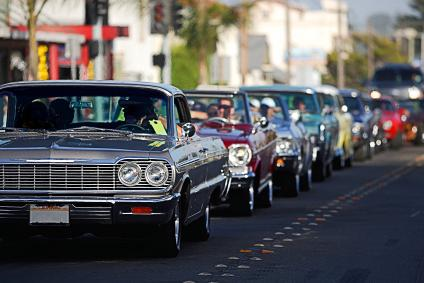

### Business Problem
XYZ Company wants a data driven approach for optimal pricing for their new vehicle. Build a prediction engine which predicts the price of vehicle on various features like fuel type, mileage, number of cylinders, horsepower etc.It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Understanding
												
1	Car_ID->			    Unique id of each observation (Interger)		
2	Symboling-> 			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is   		                    probably pretty safe.(Categorical)

3	carCompany->			Name of car company (Categorical)		
4	fueltype->			    Car fuel type i.e gas or diesel (Categorical)		
5	aspiration->			Aspiration used in a car (Categorical)		
6	doornumber->			Number of doors in a car (Categorical)		
7	carbody->			    body of car (Categorical)		
8	drivewheel->			type of drive wheel (Categorical)		
9	enginelocation->		Location of car engine (Categorical)		
10	wheelbase->			    Wheelbase of car (Numeric)		
11	carlength->			    Length of car (Numeric)		
12	carwidth->			    Width of car (Numeric)		
13	carheight->			    height of car (Numeric)		
14	curbweight->			The weight of a car without occupants or baggage. (Numeric)		
15	enginetype->			Type of engine. (Categorical)		
16	cylindernumber->		cylinder placed in the car (Categorical)		
17	enginesize->			Size of car (Numeric)		
18	fuelsystem->			Fuel system of car (Categorical)		
19	boreratio->			    Boreratio of car (Numeric)		
20	stroke->			    Stroke or volume inside the engine (Numeric)		
21	compressionratio->	    compression ratio of car (Numeric)		
22	horsepower->			Horsepower (Numeric)		
23	peakrpm->			    car peak rpm (Numeric)		
24	citympg->			    Mileage in city (Numeric)		
25	highwaympg->			Mileage on highway (Numeric)		
26	price->			        Price of car (Numeric)

### Objectives
1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import data 
gl = pd.read_csv('C:\\Users\\hp pc\\Desktop\\datasets\\AutoDataNew.csv')

# PART 1 Space Optimization

In [3]:
gl.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNumber      205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   CompanyName       205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Total memory usage is of 148.3 KB i.e, 148300 bytes

<br />

In [4]:
for dtype in ['float','int','object']:
    selected_dtype = gl.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b
    print("Average memory usage for {} columns: {:03.2f} bytes".format(dtype,mean_usage_mb))

Average memory usage for float columns: 1472.00 bytes
Average memory usage for int columns: 128.00 bytes
Average memory usage for object columns: 11420.82 bytes


### Undercasting int type columns

In [5]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b # convert bytes to megabytes
    return "{:03.2f} bytes".format(usage_mb)
gl_int = gl.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(gl_int))
print(mem_usage(converted_int))
compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

128.00 bytes
128.00 bytes


,before,after


#### There is no change seen in the int columns. It is already occupying the minimum space.

<br />

### Undercasting float type columns

In [6]:
gl_float = gl.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(gl_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

13248.00 bytes
6688.00 bytes


,before,after
float32,NaN,8.0
float64,8.0,NaN


#### The space for the float column saw a reduction of almost 49.51% after the optimization. 

<br />

In [7]:
optimized_gl = gl.copy()
optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float
print(mem_usage(gl))
print(mem_usage(optimized_gl))

151869.00 bytes
145309.00 bytes


#### Combined reduction caused by optimation of float and int columns was nearly 4.31% 

<br />

### Undercasting object type columns

In [8]:
gl_obj = gl.select_dtypes(include=['object']).copy()
gl_obj.describe()

,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,2,22,2,2,5,3,2,7,7,8
top,gas,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,32,168,115,96,120,202,148,159,94


In [9]:
converted_obj = pd.DataFrame()
for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

In [10]:
#compare
print(mem_usage(gl_obj))
print(mem_usage(converted_obj))
compare_obj = pd.concat([gl_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

125629.00 bytes
8068.00 bytes


,before,after
object,10.0,NaN
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0


#### The space for the object column saw a reduction of 93.57% after the optimization. 

In [11]:
#optimized_gl = gl.copy()
optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float
optimized_gl[converted_obj.columns] = converted_obj
print(mem_usage(gl))
print(mem_usage(optimized_gl))

151869.00 bytes
27748.00 bytes


### Combined reduction caused by optimization of float ,object and int columns was by 81.72%

<br />

# PART 2 Automated EDA

In [12]:
optimized_gl.isnull().sum()

SerialNumber        0
symboling           0
fueltype            0
CompanyName         0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
import dtale

In [14]:
d=dtale.show(gl)

In [15]:
d

## Analysing the Dependent Variable i.e price
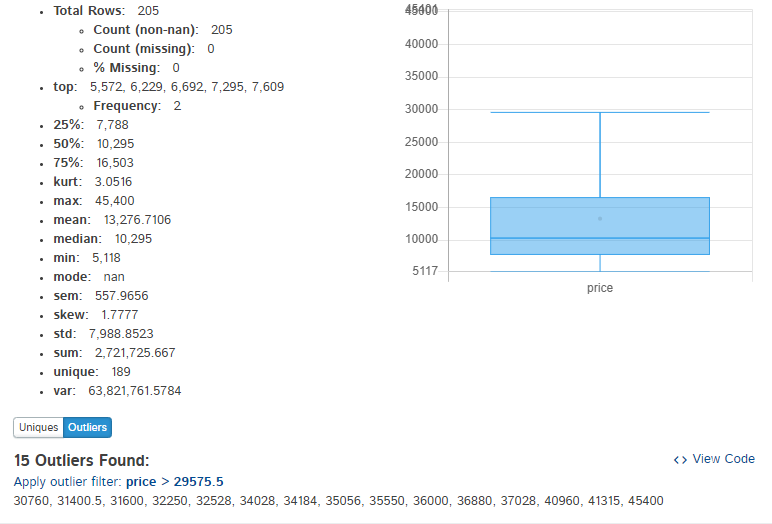
### 1. There is a significant difference between the mean and the median of the price distribution.
### 2. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400

<br />

## Fig 1 Plot showing number of cars in each Company
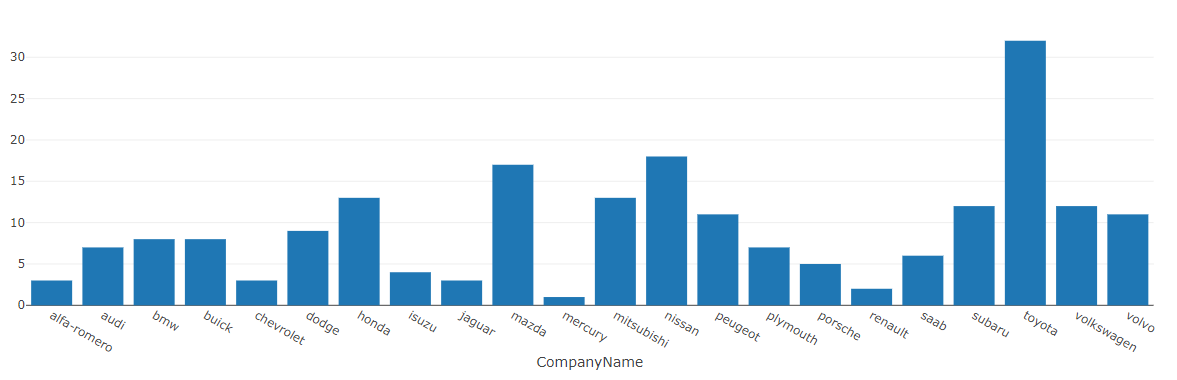
### We can interpret that most number of cars belong to the company Toyota and least number belong to the company named Mercury

<br />

## Fig 2 Plot showing the Average city mileage given by different Companies
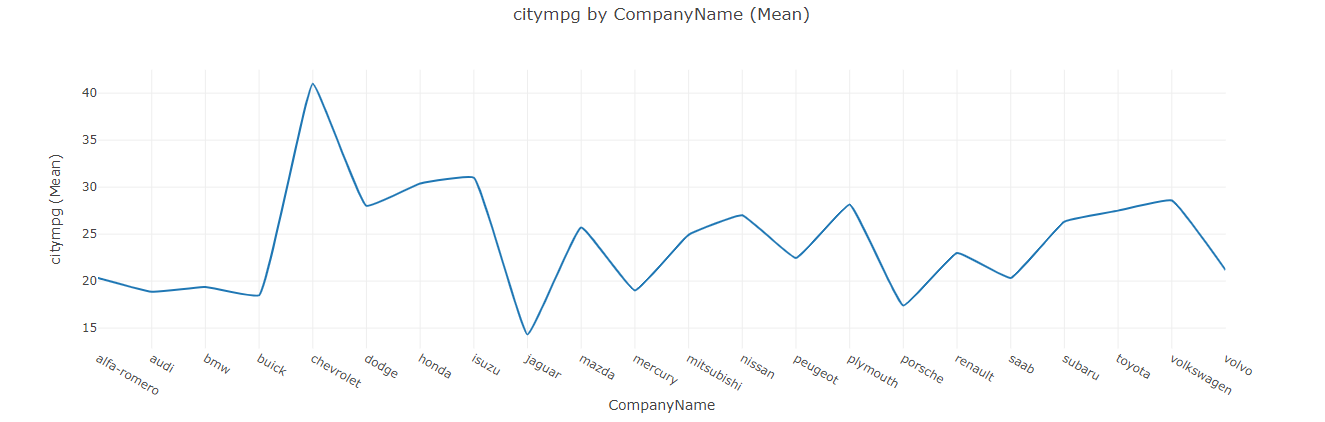
### Chevrolet has the highest city mileage of somewhere near to 40 miles per gallon and the least avearge belongs to Jaguar, usually luxurios cars tend to have low mileage. Also almost 80% of the companies tend to give a mileage of more than 20 miles per gallon. Mean of city mileage was used in this plot.

## Fig 3 Plot showing the Average highway mileage given by different Companies
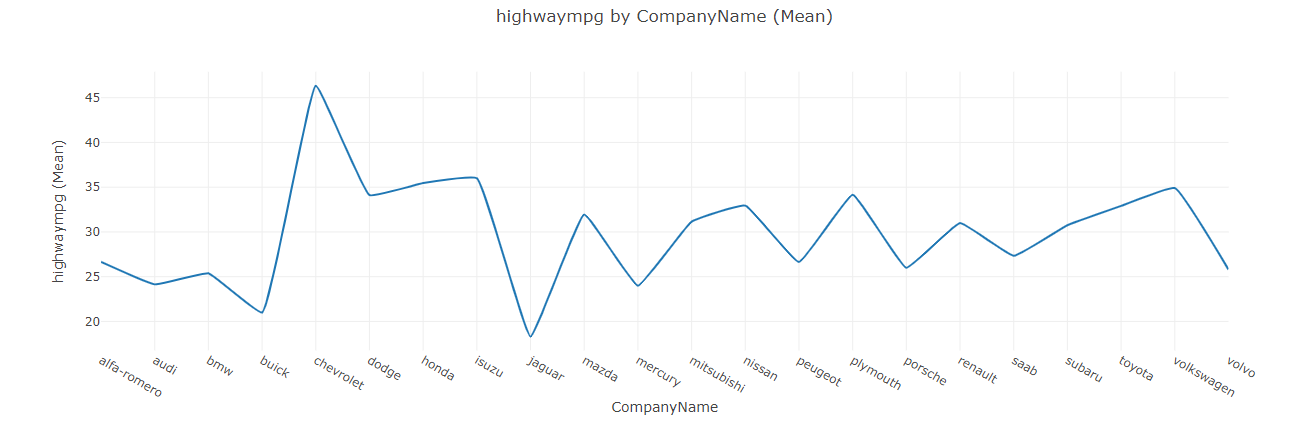

### In terms of highway mileage also Chevrolet tops the list witn an average mileage of 42 miles per gallon and again Jaguar gets the least highway mileage 


<br />

## Fig 3 Plot showing count of cars according to Fuel type
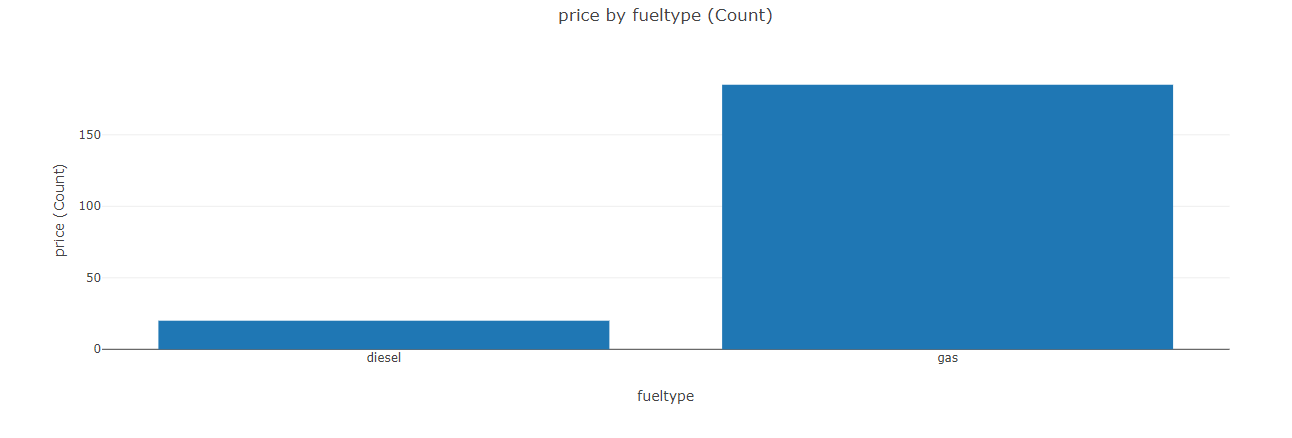
### Number of gas fueled car are more than diesel

<br />

## Fig 4 Plot showing count of cars according to Body type
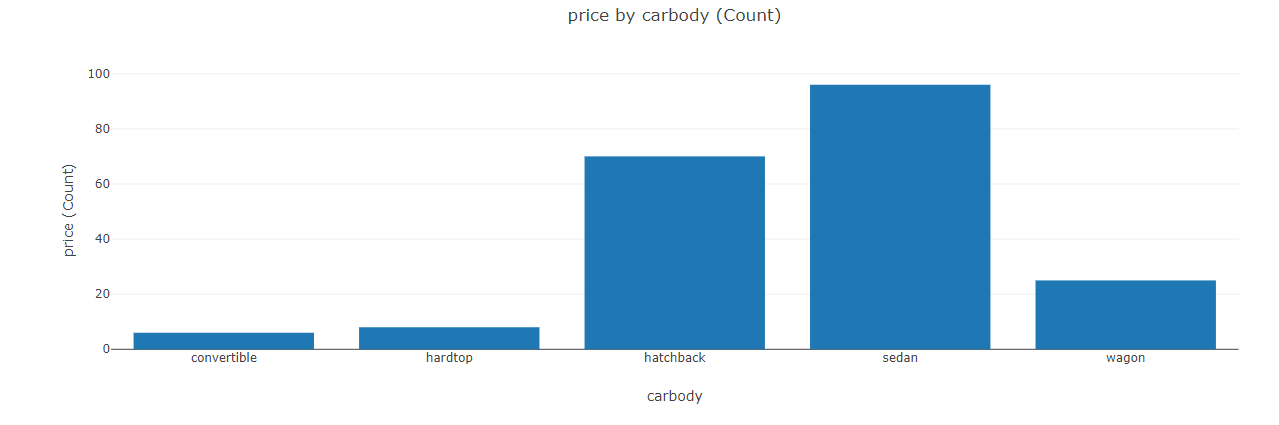
### Most the of the cars are sedan type body

<br />

## Fig 4 Plot showing distrubution with respect to company and body type
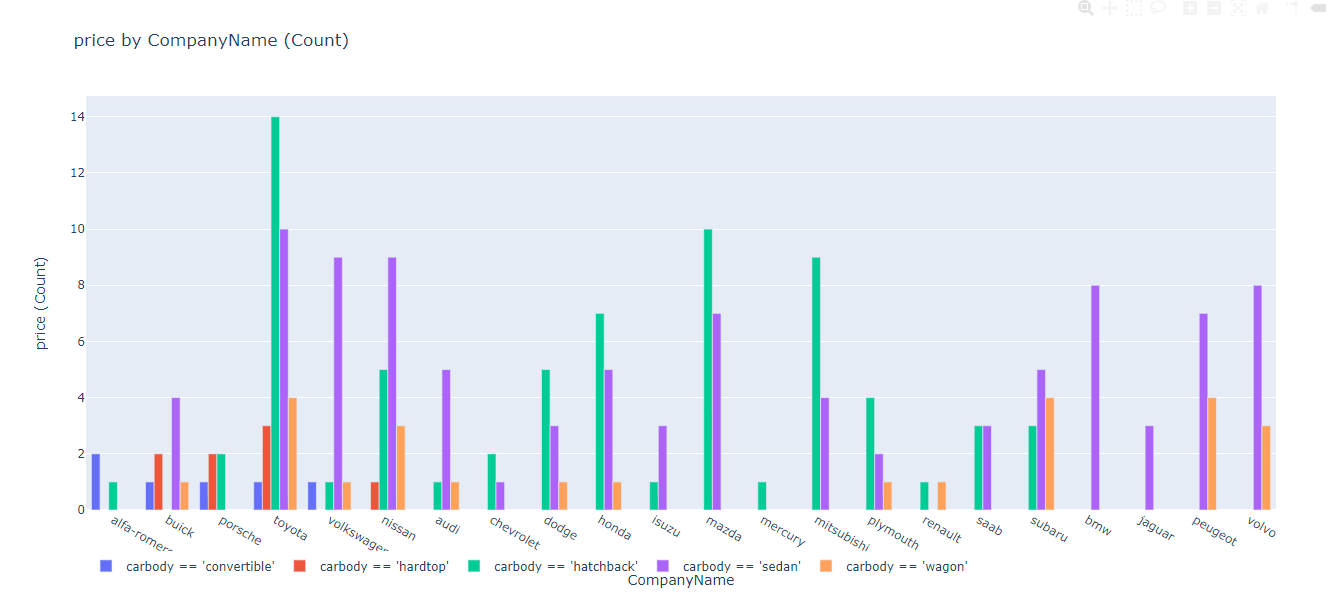
### 1. Toyota is the only company that is producing the cars of all body types and has the most number of hatchbacks.
### 2. BMW and Jaguar are only producing cars of Sedan body type
### 3. Convertible cars are made by only 5 companies that are Alfa-Romeo, Buick, Porche , Toyota and Volkswagen

<br />

# Scatter plots diplaying relationship b/w Price and various other independent variables

## Fig 5 Price vs CarLength
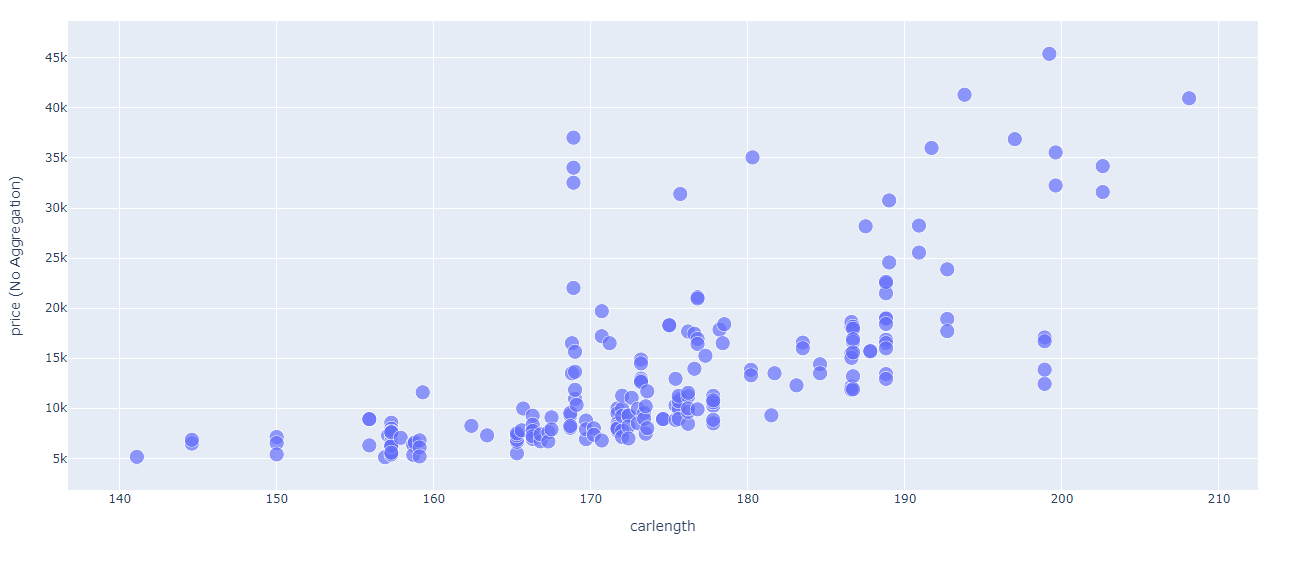

## Fig 6 Price vs CarWidth
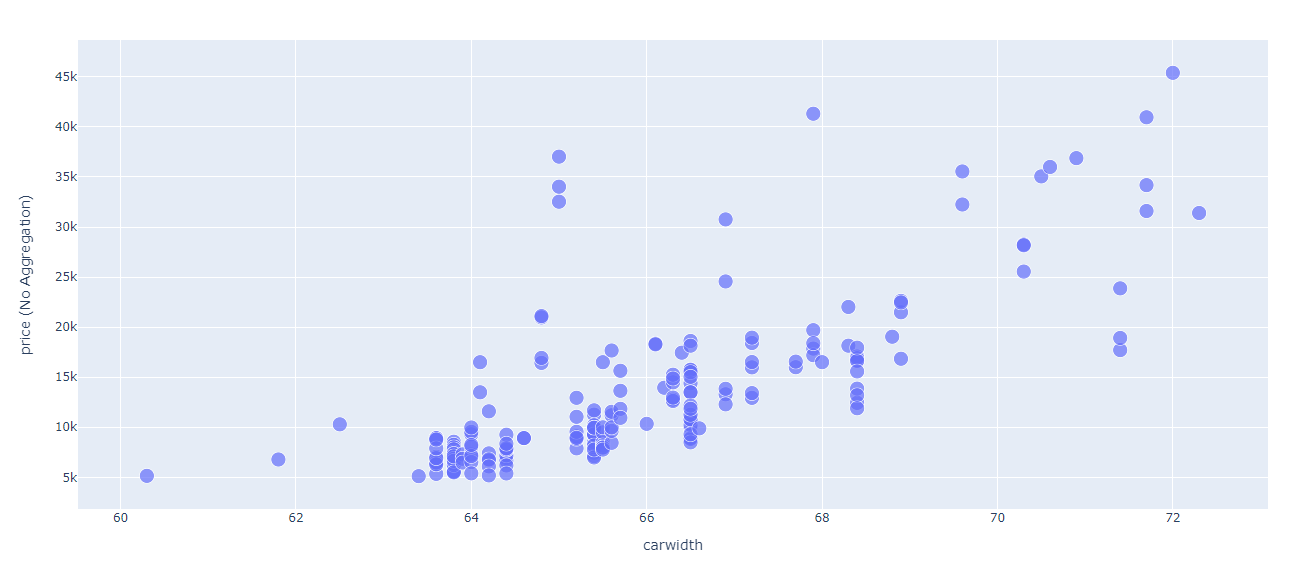

## Fig 7 Price vs CarHeight
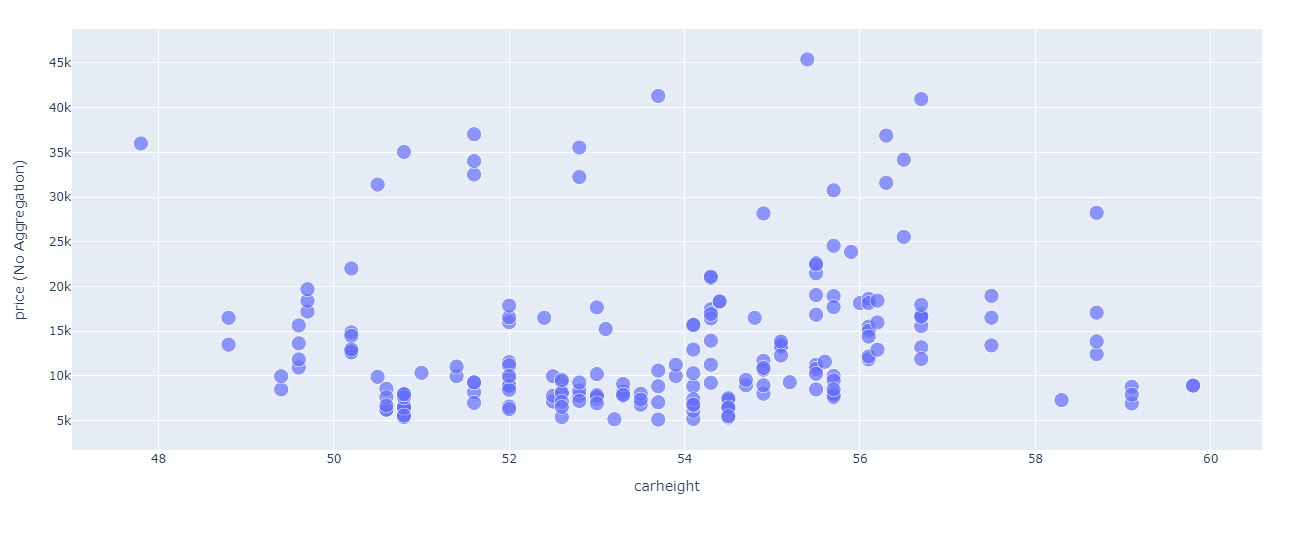

## Fig 8 Price vs CurbWeight
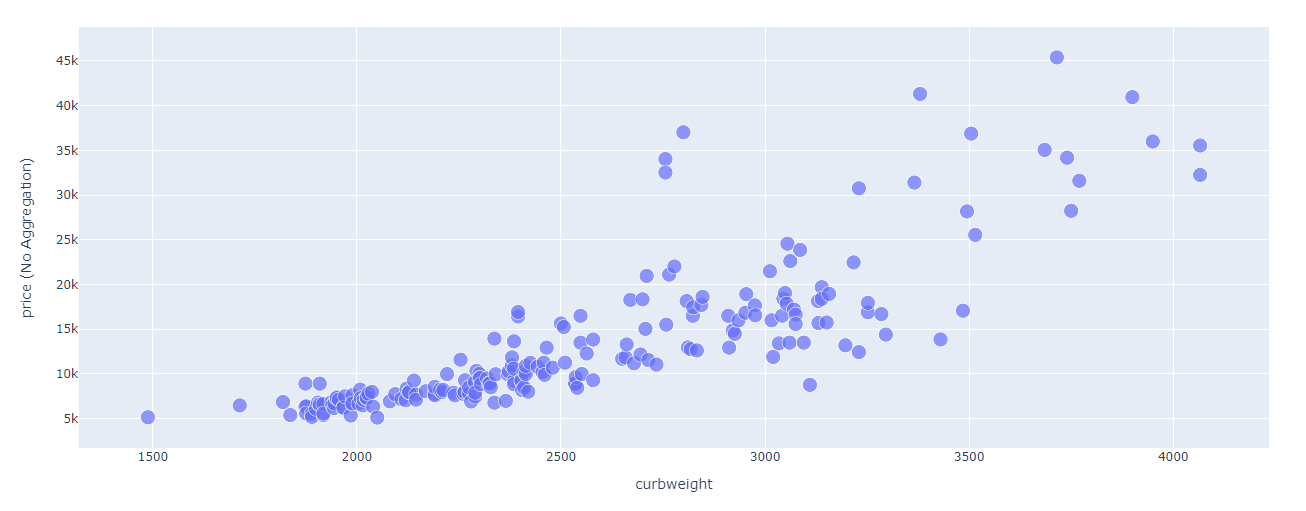

## Fig 9 Price vs boreratio
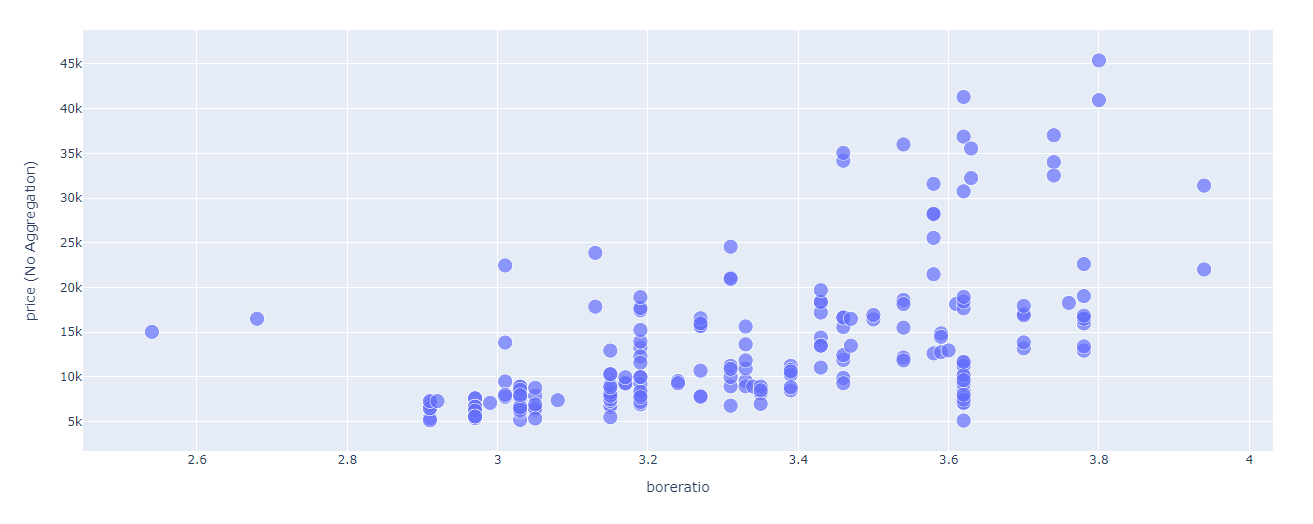

## Fig 10 Price vs horsepower
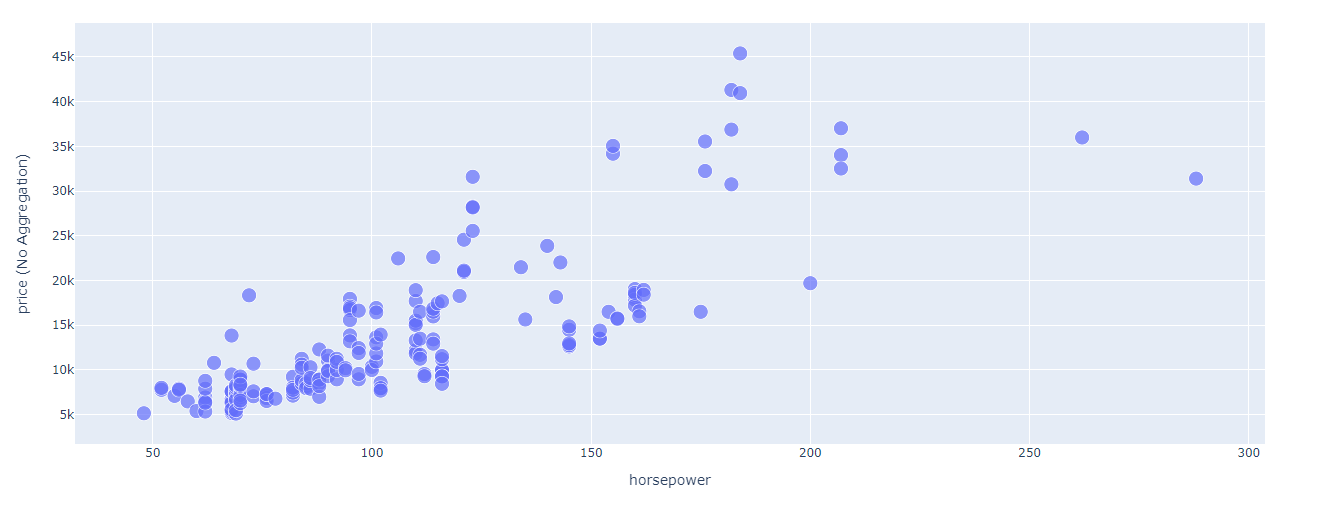

## Fig 11 Price vs wheelbase
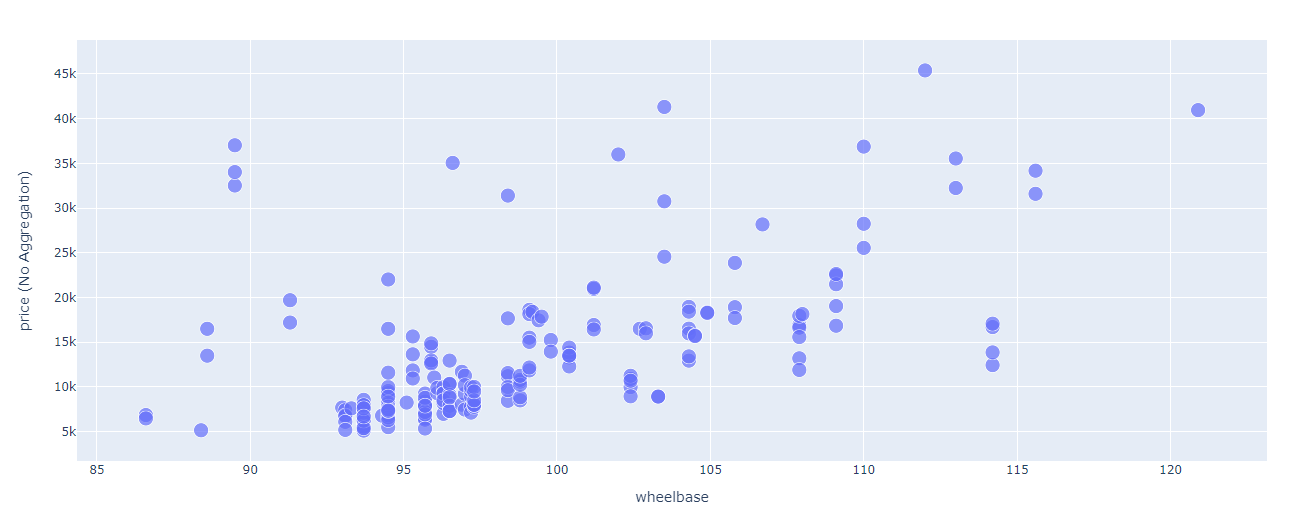

## From the above scatter plots we can infer that
### 1. carwidth, carlength, curbweight and horswpower seems to have a positive correlation with price.
### 2. carheight and wheelbase do not show any significant trend with price.

<br />

## Fig 11 Graph showing distribution of company according to engine location
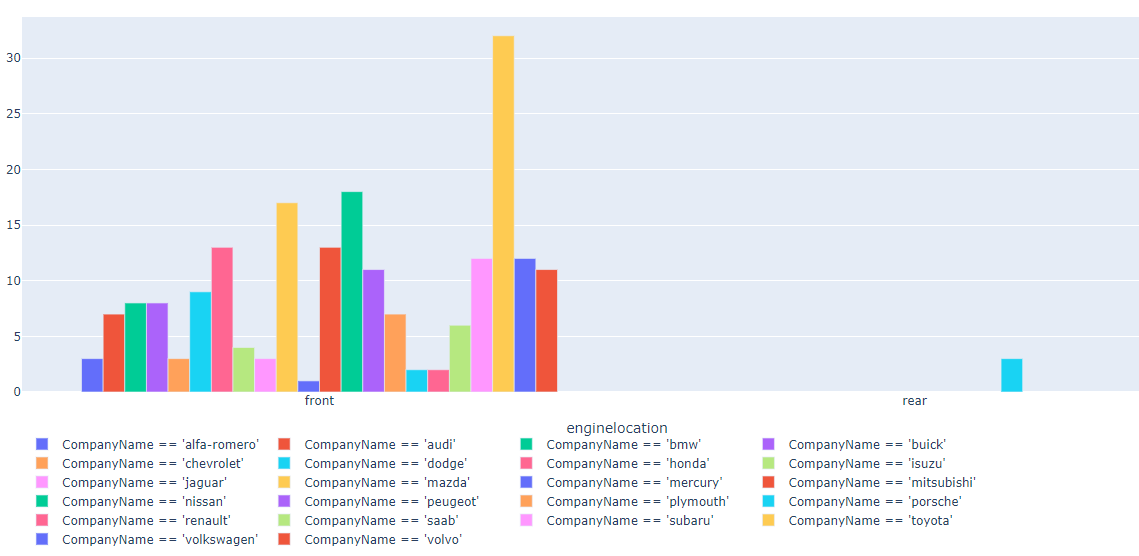
### Porche is the only company to produce cars which have engines in the rear, this type of engine placement is usually seen in luxurious vehicles

<br />

## Fig 12 Graph showing distribution of risk rating and price
##### Symboling - Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
###### The red line depicts the frequency of cars and the bar represents the Average price in that paritcular category

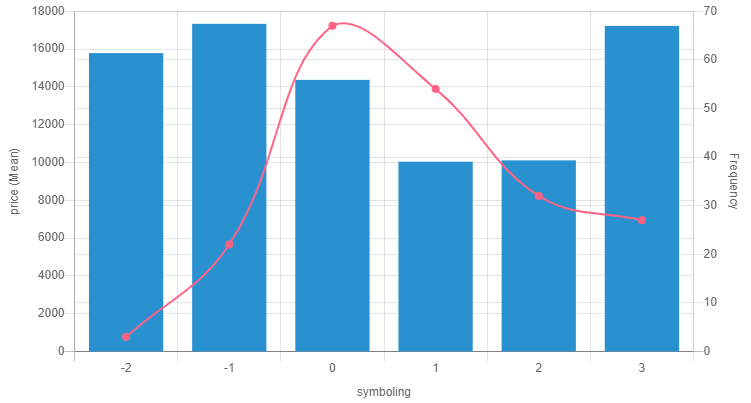
##### 1. It seems that the symboling with 0 and 1 values have highest frequency of cars and seem to be less priced when compared to other categories.
##### 2. The cars with -1 and -2 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 and -2 means the care is very safe and is quite good). 
##### 3. But it seems that symboling with rating 3 value have a high price irrespective of being quite risky.

<br />

In [16]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd

if isinstance(gl, (pd.DatetimeIndex, pd.MultiIndex)):
	gl = gl.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
gl = gl.reset_index().drop('index', axis=1, errors='ignore')
gl.columns = [str(c) for c in gl.columns]  # update columns to strings in case they are numbers

corr_cols = ['SerialNumber', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'
]
corr_data = np.corrcoef(gl[corr_cols].values, rowvar=False)
corr_data = pd.DataFrame(corr_data, columns=[corr_cols], index=[corr_cols])
corr_data.index.name = str('column')
corr_data = corr_data.reset_index()

### The above code was exported from Dtale and then seaborn was used to plot the correlation heatmap since the correlation heatmap in Dtale was to large to cover in a screenshot 

In [17]:
corr_data

,level_0,SerialNumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,SerialNumber,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
1,symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
2,wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
3,carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
4,carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
5,carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
6,curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
7,enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
8,boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
9,stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

E:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



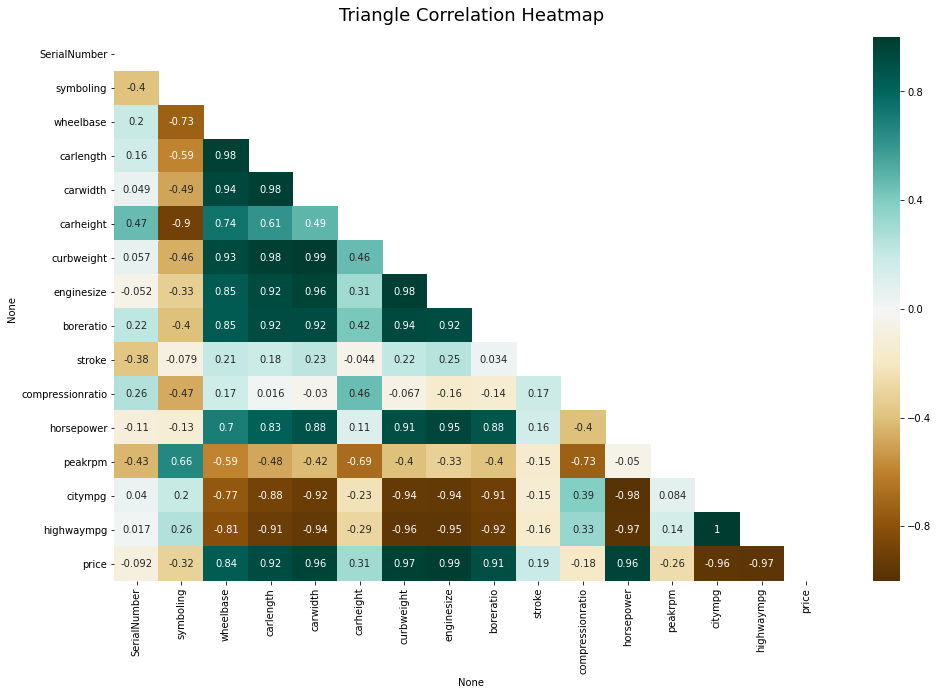

In [19]:
plt.figure(figsize=(16, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Useful insights from Correlation Heatmap
### Dependent var and Independent Variables
##### Positive corr: Price highly correlated with wheelbase,carlength, carwidth, curbweight, engine size, boreratio, horsepower(all of these variables represent the size/weight/engine power of the car)

###### Negative corr: Price negatively corr with Miles Per Gallon variables citympg and highwaympg. This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg

### Correlation among independent variables:
##### Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

<br />

<br />

# Conclusion
### List of significant variables detected after the Automated EDA  Process :
1.  Engine Type 
2.  Fuel type 
3.  Car Body  
4.  Curbweight 
5.  Car Length
6. Car width
7. Engine Size 
8. Boreratio 
9. Horse Power 
10. Wheel base 
 